<a href="https://colab.research.google.com/github/vari76/project-2-master/blob/main/ML_SecondPart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values: 0
Summary statistics:
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.0

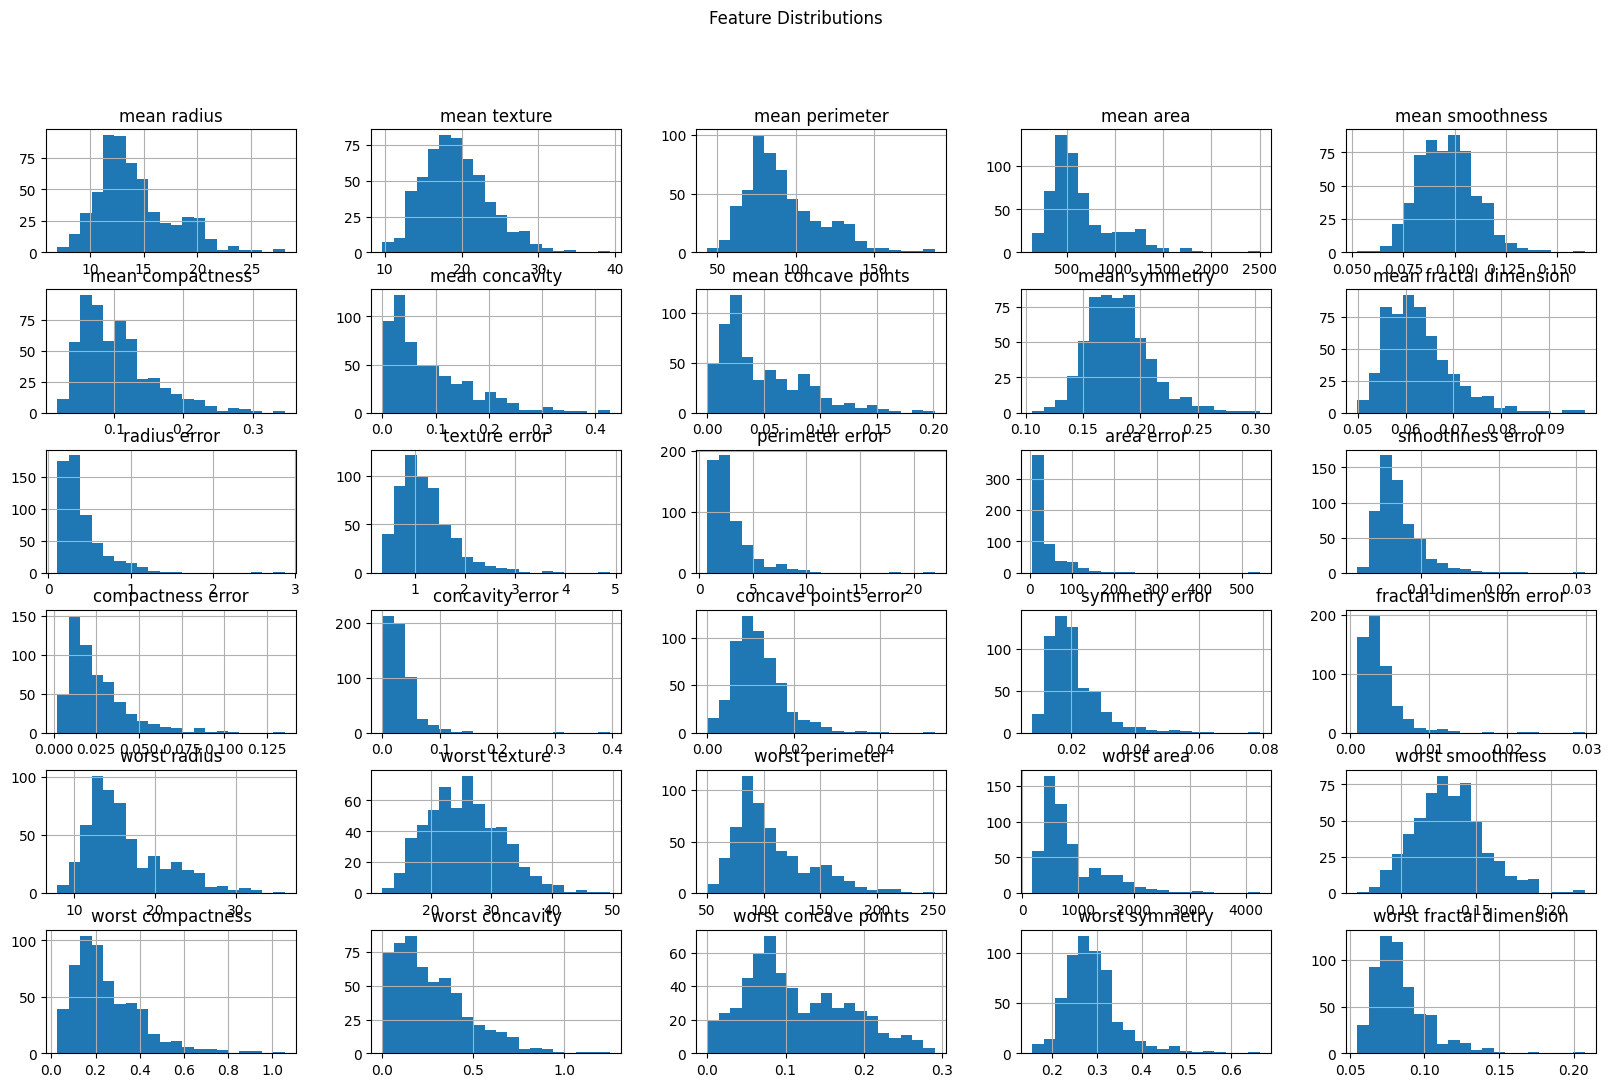

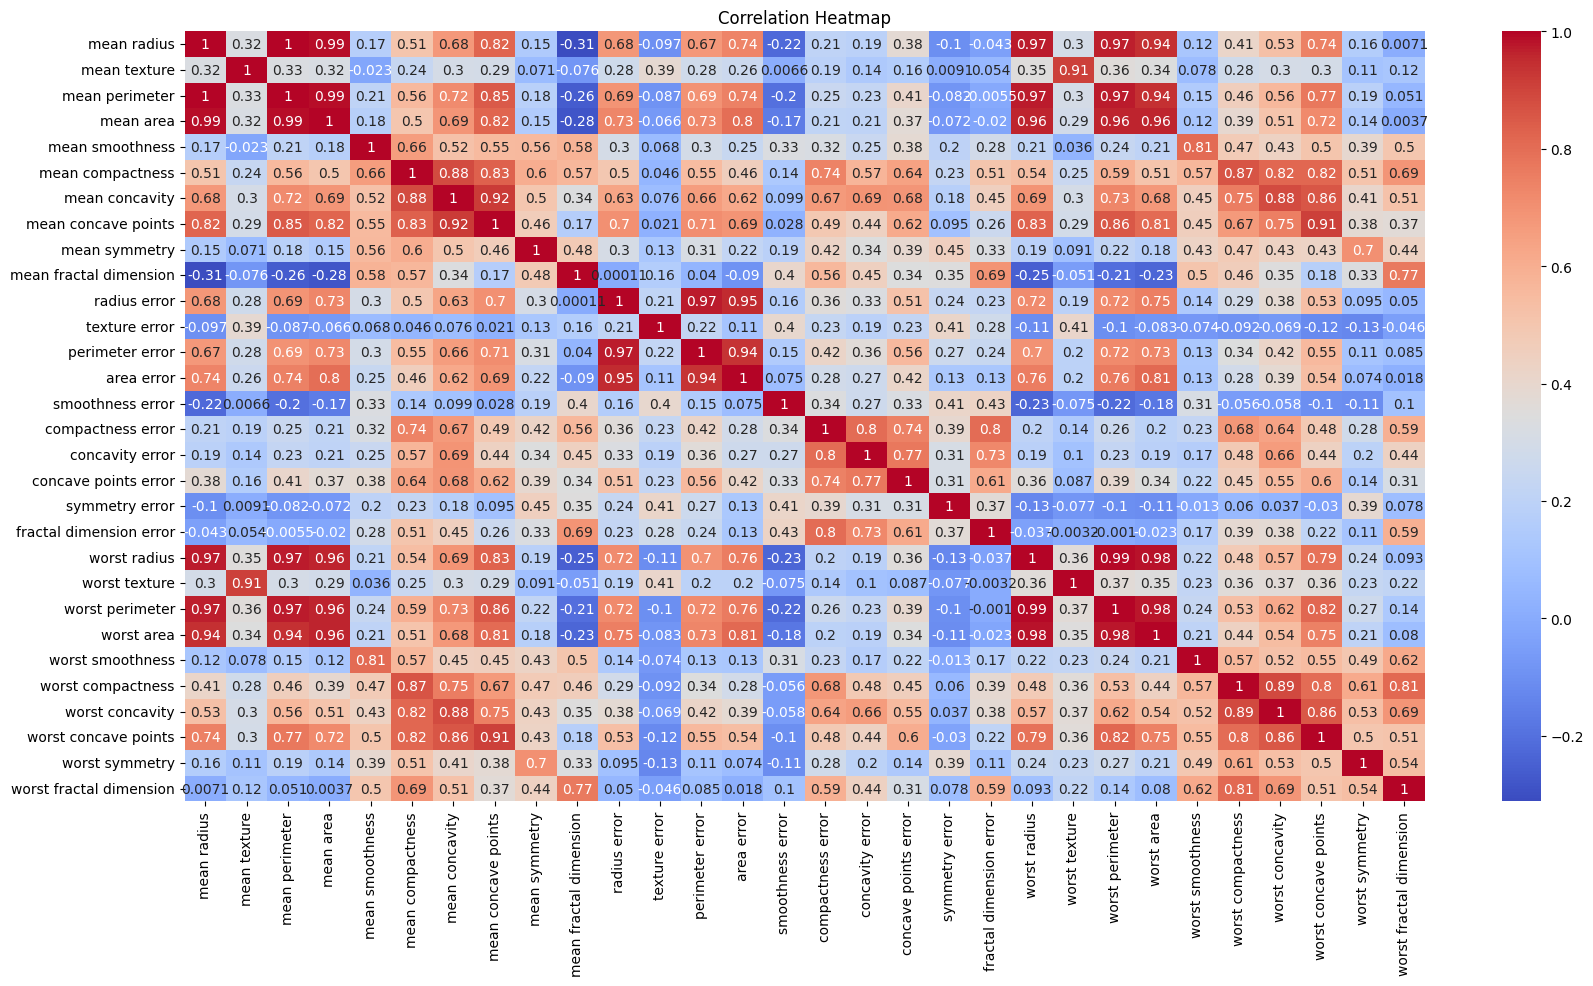



Explained Variance Ratio for Each Component:
Principal Component 1: 0.4427
Principal Component 2: 0.1897
Principal Component 3: 0.0939
Principal Component 4: 0.0660
Principal Component 5: 0.0550
Principal Component 6: 0.0402
Principal Component 7: 0.0225
Principal Component 8: 0.0159
Principal Component 9: 0.0139
Principal Component 10: 0.0117
Principal Component 11: 0.0098
Principal Component 12: 0.0087
Principal Component 13: 0.0080
Principal Component 14: 0.0052
Principal Component 15: 0.0031
Principal Component 16: 0.0027
Principal Component 17: 0.0020
Principal Component 18: 0.0018
Principal Component 19: 0.0016
Principal Component 20: 0.0010
Principal Component 21: 0.0010
Principal Component 22: 0.0009
Principal Component 23: 0.0008
Principal Component 24: 0.0006
Principal Component 25: 0.0005
Principal Component 26: 0.0003
Principal Component 27: 0.0002
Principal Component 28: 0.0001
Principal Component 29: 0.0000
Principal Component 30: 0.0000




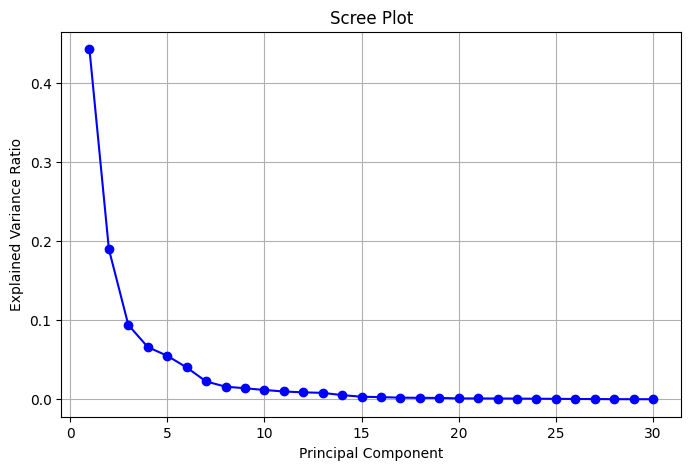

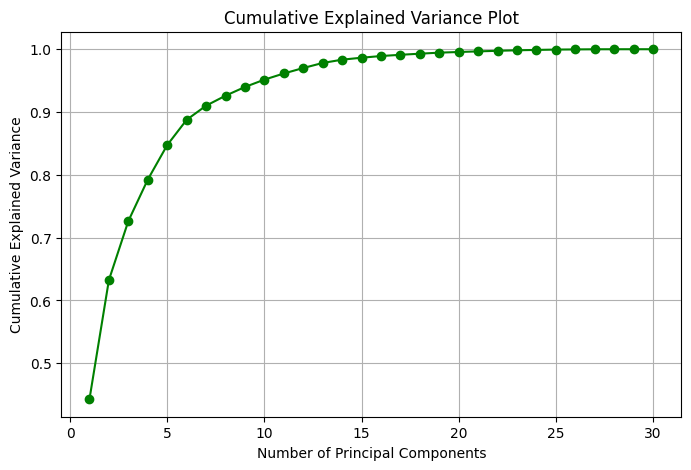



Cumulative Variance Explained by Principal Components:
Up to Principal Component 1: 0.4427
Up to Principal Component 2: 0.6324
Up to Principal Component 3: 0.7264
Up to Principal Component 4: 0.7924
Up to Principal Component 5: 0.8473
Up to Principal Component 6: 0.8876
Up to Principal Component 7: 0.9101
Up to Principal Component 8: 0.9260
Up to Principal Component 9: 0.9399
Up to Principal Component 10: 0.9516
Up to Principal Component 11: 0.9614
Up to Principal Component 12: 0.9701
Up to Principal Component 13: 0.9781
Up to Principal Component 14: 0.9834
Up to Principal Component 15: 0.9865
Up to Principal Component 16: 0.9892
Up to Principal Component 17: 0.9911
Up to Principal Component 18: 0.9929
Up to Principal Component 19: 0.9945
Up to Principal Component 20: 0.9956
Up to Principal Component 21: 0.9966
Up to Principal Component 22: 0.9975
Up to Principal Component 23: 0.9983
Up to Principal Component 24: 0.9989
Up to Principal Component 25: 0.9994
Up to Principal Component 2

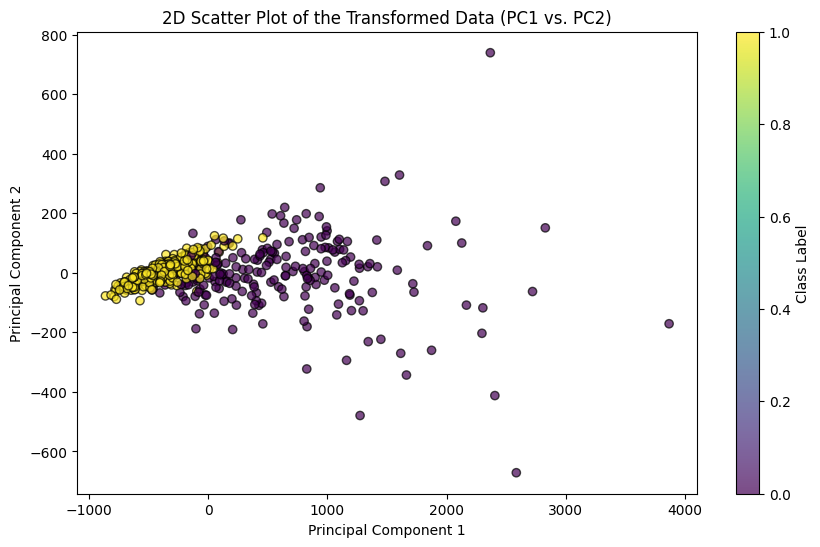

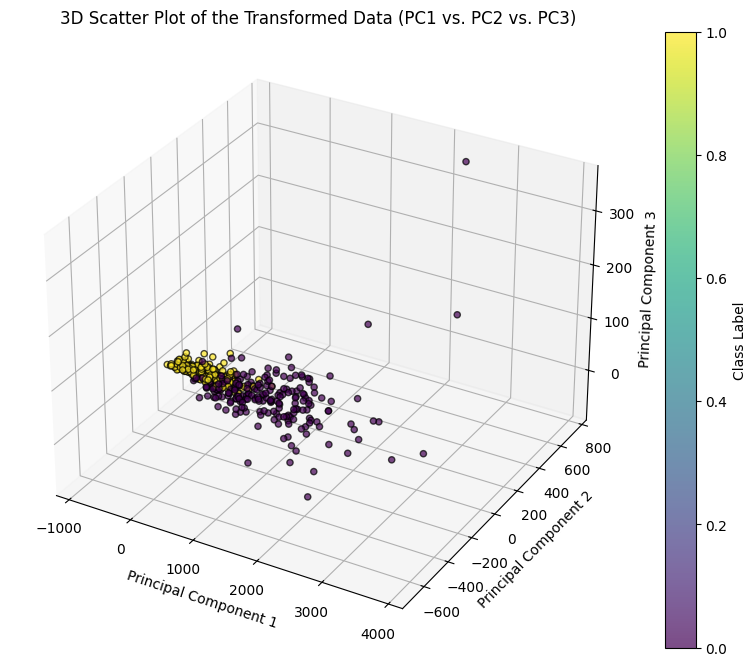



Reconstruction Error (Mean Squared Error): 0.0484


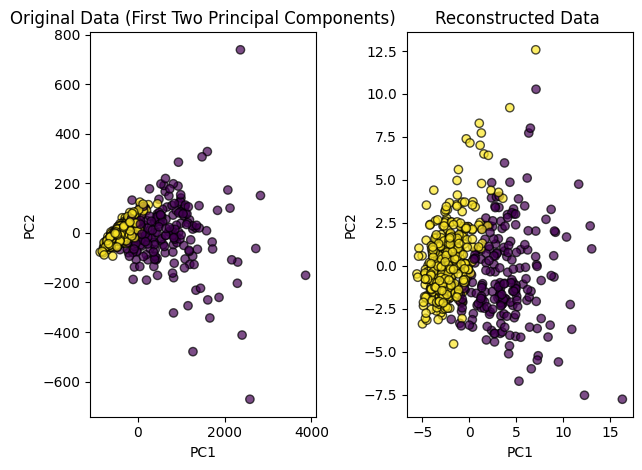

In [ ]:
# Assignment_3 Created by Varinderjeet Kaur
# Student Number:249421330
# Assignment_Tittle:Dimensionality Reduction with Principal Component Analysis

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer



from sklearn.metrics import mean_squared_error

# Step 1: Load and preprocess data
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Labels for the dataset (malignant or benign)

# 1.1 Handling missing values (if any)
# Check for missing values
print("Missing values:", X.isnull().sum().sum())

# 1.2 Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1.3 Exploratory Data Analysis (EDA)
# Summary statistics
print("Summary statistics:\n", X.describe())

# Feature distributions
X.hist(bins=20, figsize=(20, 12))
plt.suptitle("Feature Distributions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
print()
print()

# Step 2: Apply PCA and determine principal components



pca = PCA()
pca.fit(X_scaled)

#  Explained Variance by Each Principal Component
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio for each component
print("Explained Variance Ratio for Each Component:")
for i, variance in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {variance:.4f}")
print()
print()
#  Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()
print()
print()
#  Cumulative Variance Explained
cumulative_variance = np.cumsum(explained_variance_ratio)
print()
print()
# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='g')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")
plt.grid(True)
plt.show()
print()
print()
# Print cumulative variance explained
print("Cumulative Variance Explained by Principal Components:")
for i, variance in enumerate(cumulative_variance, start=1):
    print(f"Up to Principal Component {i}: {variance:.4f}")
print()
print()
#  Choose the Optimal Number of Components
# Selecting number of components to retain ~90% of variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain ~95% variance: {num_components}")
print()
print()
# Step 6: Transform the Original Dataset
pca_optimal = PCA(n_components=num_components)
X_reduced = pca_optimal.fit_transform(X_scaled)
print("Shape of the reduced dataset:", X_reduced.shape)
print()
print()

#  Visualize the transformed data (2D plot using the first two principal components)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of the Transformed Data (PC1 vs. PC2)')
plt.colorbar(label='Class Label')
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Plot the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of the Transformed Data (PC1 vs. PC2 vs. PC3)')
fig.colorbar(scatter, label='Class Label')
plt.show()
print()
print()



# Apply PCA with the selected number of components (e.g., 10 components)
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X_scaled)
X_reconstructed = pca_10.inverse_transform(X_pca_10)

# Calculate the reconstruction error (MSE)
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f"Reconstruction Error (Mean Squared Error): {reconstruction_error:.4f}")

# Original data (first two principal components)

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Original Data (First Two Principal Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Reconstructed data (first two principal components)

X_reconstructed_pca = pca.transform(X_reconstructed)
plt.subplot(1, 2, 2)
plt.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Reconstructed Data ')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

